# Introduction 

In the following notebook, I will be exploring a cleaned version of the energy_dataset.csv file.

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [2]:
#Set preferences for pandas 
pd.set_option("display.max_columns", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

**Read in data**

In [3]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Energy_Dataset.csv', index_col='date_time')

# Data Overview

* time: Datetime index localized to CET
* total load forecast: forecasted electrical demand
* total load actual: actual electrical demand
* price day ahead: forecasted price EUR/MWh
* price actual: price in EUR/MWh
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of recording
* **month**: month of recording
* **year**: year of recording

**Data Preview**

In [4]:
#Print df shape
print('Shape of data:', df.shape)

#View head
df.head()

Shape of data: (35064, 9)


,total load forecast,total load actual,price day ahead,price actual,date,time,weekday,month,year
date_time,,,,,,,,,
2015-01-01 00:00:00,26118.0,25385.0,50.10,65.41,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,24934.0,24382.0,48.10,64.92,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,23515.0,22734.0,47.33,64.48,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,22642.0,21286.0,42.27,59.32,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,21785.0,20264.0,38.41,56.04,2015-01-01,04:00:00,Thursday,January,2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total load forecast  35064 non-null  float64
 1   total load actual    35064 non-null  float64
 2   price day ahead      35064 non-null  float64
 3   price actual         35064 non-null  float64
 4   date                 35064 non-null  object 
 5   time                 35064 non-null  object 
 6   weekday              35064 non-null  object 
 7   month                35064 non-null  object 
 8   year                 35064 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 2.7+ MB


In [6]:
df.describe()

,total load forecast,total load actual,price day ahead,price actual,year
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,28712.129962,28697.608573,49.874341,57.884023,2016.499658
std,4594.100854,4575.872425,14.618900,14.204083,1.117744
min,18105.000000,18041.000000,2.060000,9.330000,2015.000000
25%,24793.750000,24806.750000,41.490000,49.347500,2016.000000
50%,28906.000000,28902.000000,50.520000,58.020000,2016.000000
75%,32263.250000,32194.250000,60.530000,68.010000,2017.000000
max,41390.000000,41015.000000,101.990000,116.800000,2018.000000


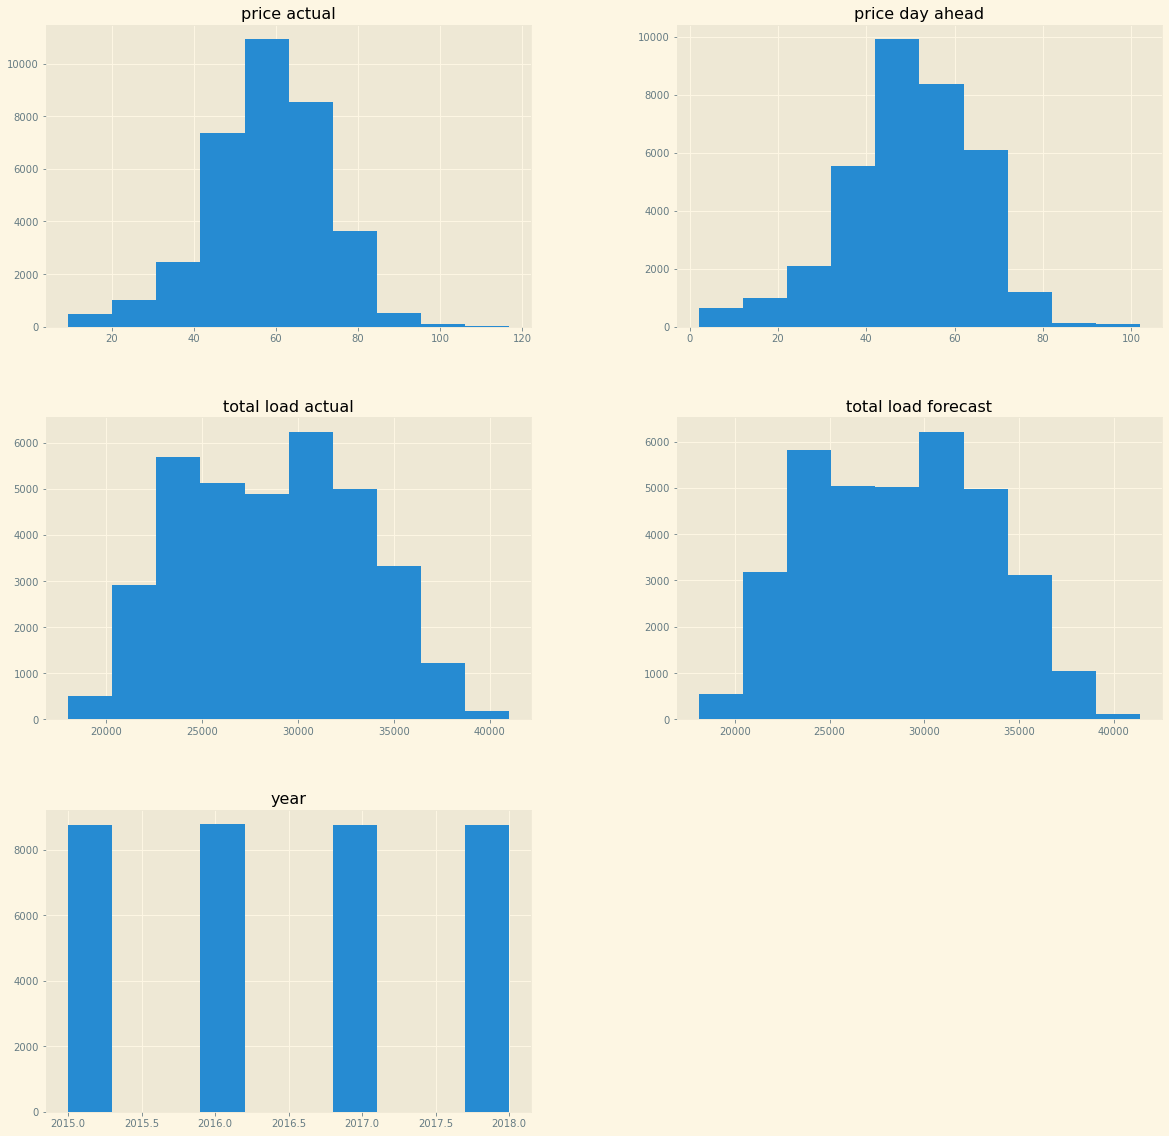

In [7]:
df.hist(figsize  = (20,20));

In [ ]:
def time_series_overview

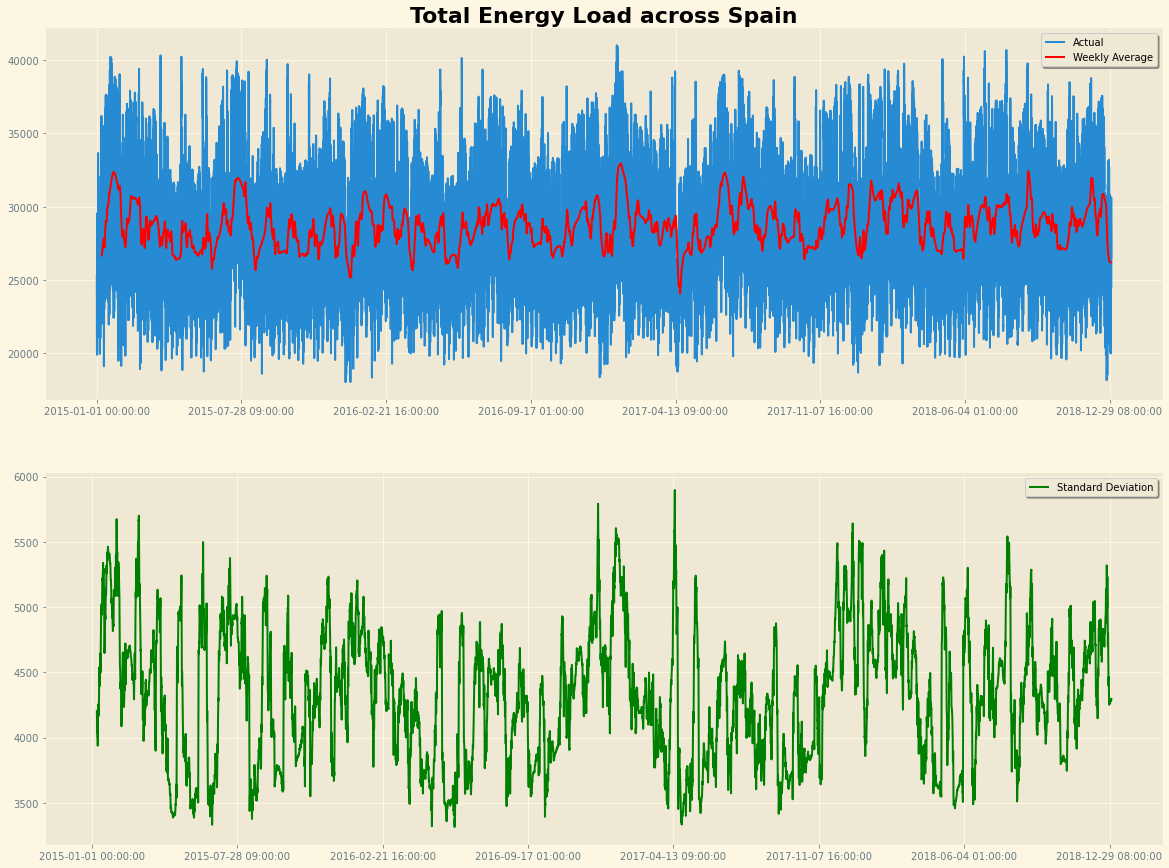

In [38]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,15))

#Plot data
df['total load actual'].plot(ax=ax[0], label = 'Actual', )
df['total load actual'].rolling(24*7,24*7).mean().plot(ax=ax[0],color = 'r',label = 'Weekly Average')
df['total load actual'].rolling(24*7,24*7).std().plot(ax=ax[1],color = 'g',label = 'Standard Deviation')

###Set plot aesthetics###
#Plot 1
ax[0].set_title('Total Energy Load across Spain',fontsize = 22, fontweight = 'bold')

ax[0].set_xlabel('')

ax[0].legend(fancybox = True, shadow = True, frameon = True)


#Plot 2
ax[1].set_title('')

ax[1].set_xlabel('')

ax[1].legend(fancybox = True, shadow = True, frameon = True)


In [ ]:
#Energy Consumption by hour
df.sort_values(by = 'time').plot(x = 'time', y = 'temp', figsize = (20,10))

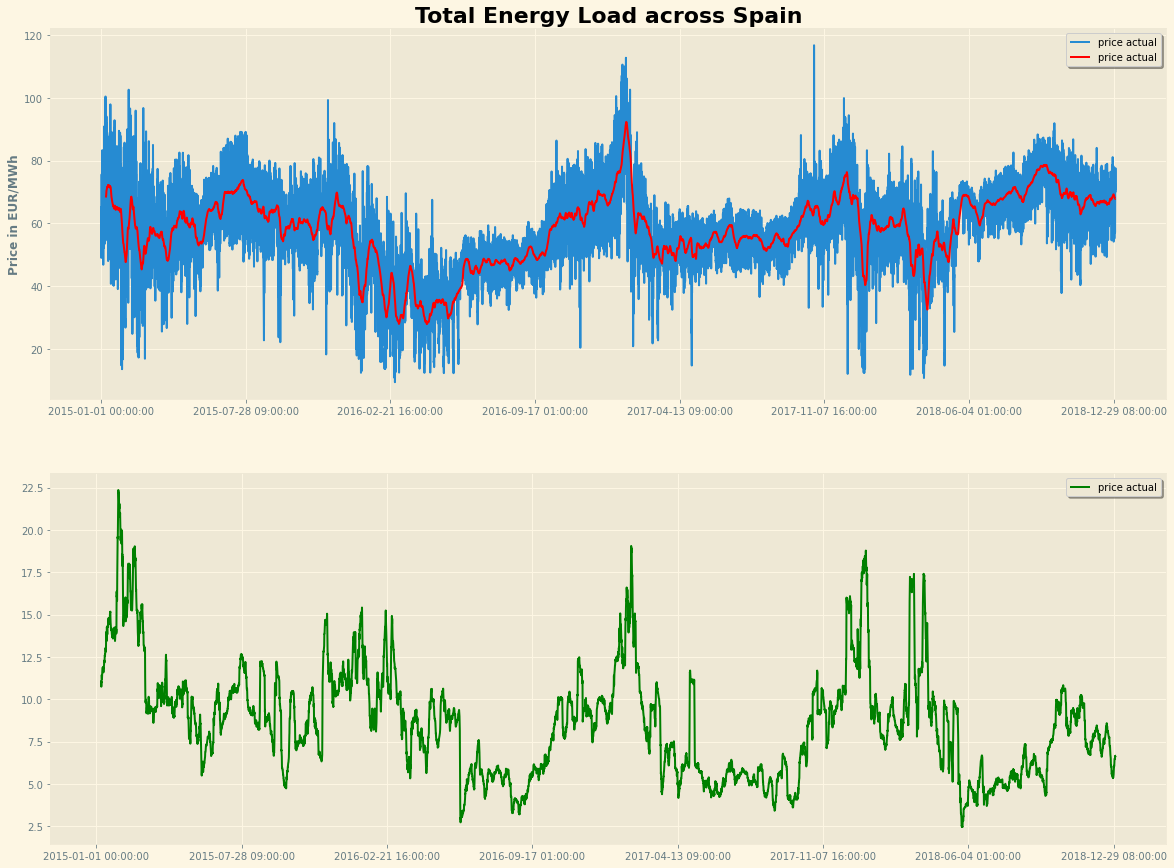

In [37]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,15))

df['price actual'].plot(ax =ax[0])

df['price actual'].rolling(24*7,24*7).mean().plot(ax =ax[0],color = 'r')
df['price actual'].rolling(24*7,24*7).std().plot(ax =ax[1], color = 'g')

###Set plot aesthetics###
#Plot 1
ax[0].set_title('Total Energy Load across Spain',fontsize = 22, fontweight = 'bold')

ax[0].set_xlabel('')
ax[0].set_ylabel('Price in EUR/MWh', fontweight = 'bold')
ax[0].legend(fancybox = True, shadow = True, frameon = True)


#Plot 2
ax[1].set_title('')

ax[1].set_xlabel('')

ax[1].legend(fancybox = True, shadow = True, frameon = True)

Correlation between load and price

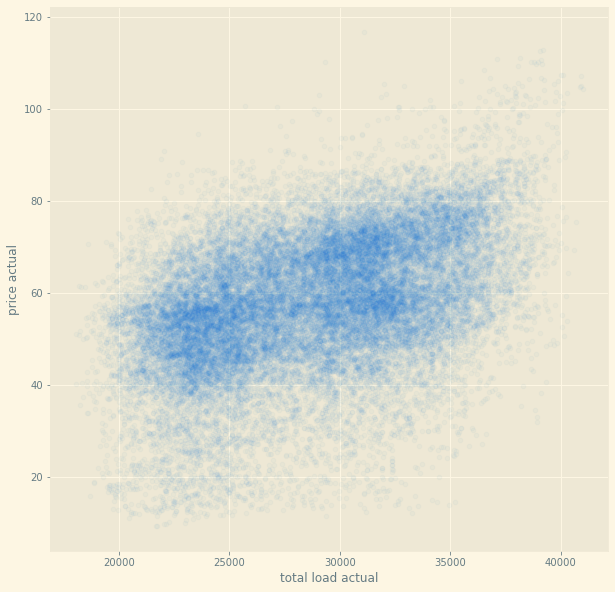

In [49]:
f, ax = plt.subplots(figsize = (10,10))



#df.plot(x = 'total load actual', y = 'price actual', kind = 'hexbin', alpha = .3,ax = ax )
df.plot(x = 'total load actual', y = 'price actual', kind = 'scatter', alpha = .03,ax = ax )

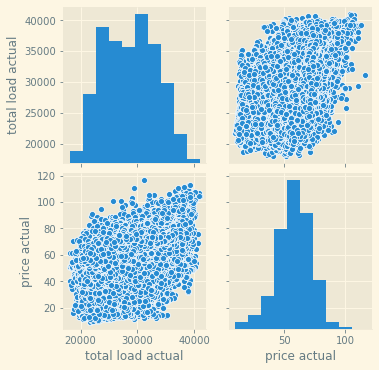

In [50]:
sns.pairplot(df[['total load actual','price actual']])